In [26]:
import pandas as pd
import numpy as np
import sklearn.preprocessing as sk_pre
import sklearn.metrics as sk_metri
import sklearn.linear_model as sk_linear
import sklearn.model_selection as sk_model
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
df=pd.read_csv('Updated_Algerian.csv',index_col=[0])
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


In [39]:
df['Classes']=np.where(df['Classes']=='fire',1,0)
df['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [40]:
df.drop(columns=['day','month','year'],inplace=True)
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


In [65]:
X=df[[i for i in df.columns if i != 'FWI']]
y=df['FWI']
X_train,X_test,y_train,y_test=sk_model.train_test_split(X,y,test_size=0.3)

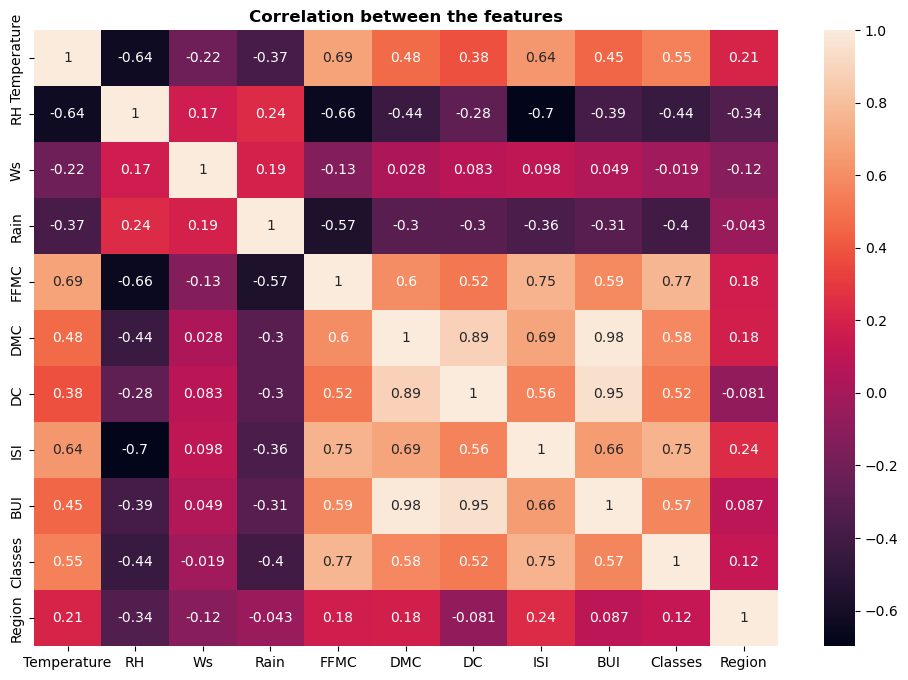

In [66]:
plt.figure(figsize=(12,8))
plt.title('Correlation between the features',weight='bold')
sns.heatmap(X_train.corr(),annot=True)
plt.show()

In [69]:
def feature_selection(dataset,threshold):
    corr_matrix=dataset.corr()
    remove=set()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                remove.add(corr_matrix.columns[i])
    return remove

In [70]:
remove=feature_selection(X_train,0.85)
print('removing the colums :',remove)
X_train.drop(columns=remove,inplace=True)
X_test.drop(columns=remove,inplace=True)
X_train.shape , X_test.shape

removing the colums : {'DC', 'BUI'}


((170, 9), (73, 9))

## __Standard Scaling__

In [71]:
scaler=sk_pre.StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

## Box Plot

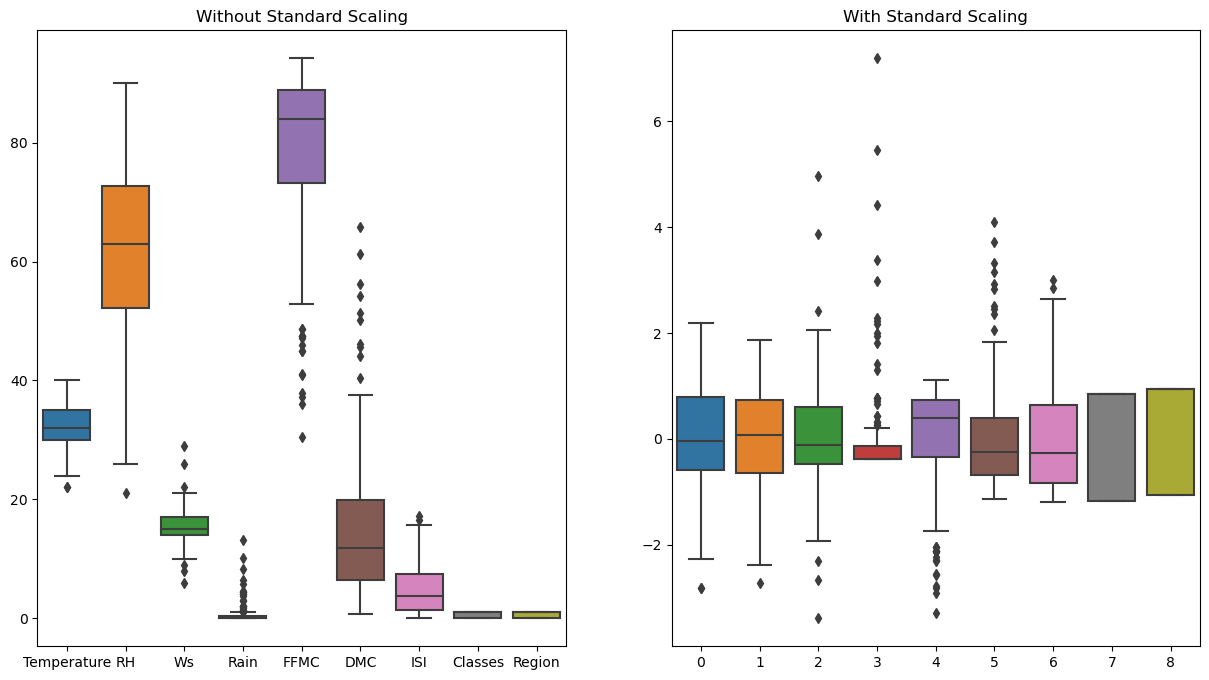

In [72]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('Without Standard Scaling')
sns.boxplot(data=X_train)
plt.subplot(1,2,2)
plt.title('With Standard Scaling')
sns.boxplot(data=X_train_scaled)
plt.show()

# Model Training

## Linear Regression

In [77]:
linear=sk_linear.LinearRegression()
linear.fit(X_train_scaled,y_train)
y_pred=linear.predict(X_test_scaled)
mse=sk_metri.mean_squared_error(y_test,y_pred)
r2=sk_metri.r2_score(y_test,y_pred)
n=len(y_test)
p=X_test_scaled.shape[1]
absolute_r2=1-((1-r2)*(n-1)/(n-p-1))
print('The value of mean squared error :',mse)
print('The value of r2 score is :',r2)
print('The value of r2 absolute is :',absolute_r2)

The value of mean squared error : 3.5872773112719827
The value of r2 score is : 0.9287877293157192
The value of r2 absolute is : 0.9186145477893933


## Lasso

In [78]:
lasso=sk_linear.Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mse=sk_metri.mean_squared_error(y_test,y_pred)
r2=sk_metri.r2_score(y_test,y_pred)
n=len(y_test)
p=X_test_scaled.shape[1]
absolute_r2=1-((1-r2)*(n-1)/(n-p-1))
print('The value of mean squared error :',mse)
print('The value of r2 score is :',r2)
print('The value of r2 absolute is :',absolute_r2)

The value of mean squared error : 3.504336819476418
The value of r2 score is : 0.9304342094286098
The value of r2 absolute is : 0.9204962393469825


## Rigid

In [79]:
rigid=sk_linear.Ridge()
rigid.fit(X_train_scaled,y_train)
y_pred=rigid.predict(X_test_scaled)
mse=sk_metri.mean_squared_error(y_test,y_pred)
r2=sk_metri.r2_score(y_test,y_pred)
n=len(y_test)
p=X_test_scaled.shape[1]
absolute_r2=1-((1-r2)*(n-1)/(n-p-1))
print('The value of mean squared error :',mse)
print('The value of r2 score is :',r2)
print('The value of r2 absolute is :',absolute_r2)

The value of mean squared error : 3.492133297882559
The value of r2 score is : 0.9306764657159374
The value of r2 absolute is : 0.920773103675357


## Elastic Net

In [80]:
elastic_net=sk_linear.ElasticNet()
elastic_net.fit(X_train_scaled,y_train)
y_pred=elastic_net.predict(X_test_scaled)
mse=sk_metri.mean_squared_error(y_test,y_pred)
r2=sk_metri.r2_score(y_test,y_pred)
n=len(y_test)
p=X_test_scaled.shape[1]
absolute_r2=1-((1-r2)*(n-1)/(n-p-1))
print('The value of mean squared error :',mse)
print('The value of r2 score is :',r2)
print('The value of r2 absolute is :',absolute_r2)

The value of mean squared error : 5.714601651122602
The value of r2 score is : 0.8865574851562606
The value of r2 absolute is : 0.870351411607155


# Pickling

In [81]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(lasso,open('lasso.pkl','wb'))
pickle.dump(rigid,open('rigid.pkl','wb'))
pickle.dump(elsa,open('elsa.pkl','wb'))